### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
#### The company wants to know
###### Which variables are significant in predicting the demand for shared bikes.
###### How well those variables describe the bike demands
Below is the data dictionary :-
	- instant: record index,
	- dteday : date,
	- season : season (1:spring, 2:summer, 3:fall, 4:winter),
	- yr : year (0: 2018, 1:2019),
	- mnth : month ( 1 to 12),
	- holiday : weather day is a holiday or not,
	- weekday : day of the week,
	- workingday : if day is neither weekend nor holiday is 1: otherwise is 0,
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy,
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,
	- temp : temperature in Celsius,
	- atemp: feeling temperature in Celsius,
	- hum: humidity,
	- windspeed: wind speed,
	- casual: count of casual users,
	- registered: count of registered users,
	- cnt: count of total rental bikes including both casual and registered

### Import packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data = pd.read_csv("Bike sharing_LR.csv")

### Read and understand the data

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Rename the column names appropriately

newcolumns = {'instant':'RecordNo','dteday':'Date','season':'Season','yr':'Year','mnth':'Month','holiday':'Holiday',
              'weekday':'Weekday','workingday':'Workingday','weathersit':'Weather','temp':'Temp','atemp':'Atemp',
              'hum':'Humidity','windspeed':'WindSpeed','casual':'Casual','registered':'Registered','cnt':'Count'}
bike_data = bike_data.rename(columns=newcolumns)

In [5]:
bike_data.head()

,RecordNo,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,WindSpeed,Casual,Registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordNo    730 non-null    int64  
 1   Date        730 non-null    object 
 2   Season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   Month       730 non-null    int64  
 5   Holiday     730 non-null    int64  
 6   Weekday     730 non-null    int64  
 7   Workingday  730 non-null    int64  
 8   Weather     730 non-null    int64  
 9   Temp        730 non-null    float64
 10  Atemp       730 non-null    float64
 11  Humidity    730 non-null    float64
 12  WindSpeed   730 non-null    float64
 13  Casual      730 non-null    int64  
 14  Registered  730 non-null    int64  
 15  Count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Correct the type of the columns

bike_data['Date'] = bike_data['Date'].astype('datetime64')
bike_data['Season'] = bike_data['Season'].astype('category')
bike_data['Year'] = bike_data['Year'].astype('category')
bike_data['Month'] = bike_data['Month'].astype('category')
bike_data['Holiday'] = bike_data['Holiday'].astype('category')
bike_data['Weekday'] = bike_data['Weekday'].astype('category')
bike_data['Workingday'] = bike_data['Workingday'].astype('category')

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RecordNo    730 non-null    int64         
 1   Date        730 non-null    datetime64[ns]
 2   Season      730 non-null    category      
 3   Year        730 non-null    category      
 4   Month       730 non-null    category      
 5   Holiday     730 non-null    category      
 6   Weekday     730 non-null    category      
 7   Workingday  730 non-null    category      
 8   Weather     730 non-null    int64         
 9   Temp        730 non-null    float64       
 10  Atemp       730 non-null    float64       
 11  Humidity    730 non-null    float64       
 12  WindSpeed   730 non-null    float64       
 13  Casual      730 non-null    int64         
 14  Registered  730 non-null    int64         
 15  Count       730 non-null    int64         
dtypes: category(6), datetime64

#### There are no null values in the data. 

In [9]:
bike_data.describe()

,RecordNo,Weather,Temp,Atemp,Humidity,WindSpeed,Casual,Registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Correct labeling for categorical columns
	- season : season (1:spring, 2:summer, 3:fall, 4:winter),
	- yr : year (0: 2018, 1:2019),
    - mnth : month ( 1 to 12),
	- holiday : weather day is a holiday or not,
	- weekday : day of the week,
    - workingday : if day is neither weekend nor holiday is 1: otherwise is 0,
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy,
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,

In [10]:
bike_data.Season = bike_data.Season.replace({1:'Spring',2:'Summer', 3:'Fall', 4:'Winter'})
bike_data.Year= bike_data.Year.replace({0:'2018',1:'2019'})
bike_data.Month = bike_data.Month.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data.Holiday= bike_data.Holiday.replace({0:'NoHoliday',1:'Holiday'})
bike_data.Weekday = bike_data.Weekday.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bike_data.Workingday= bike_data.Workingday.replace({0:'NoWorkingDay',1:'WorkingDay'})
bike_data.Weather = bike_data.Weather.replace({1: 'Clear',2: 'Mist',3: 'Light Snow',4: 'Heavy Rain'})

In [11]:
bike_data.head()

,RecordNo,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Atemp,Humidity,WindSpeed,Casual,Registered,Count
0,1,2018-01-01,Spring,2018,Jan,NoHoliday,Tue,WorkingDay,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,2018,Jan,NoHoliday,Wed,WorkingDay,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,2018,Jan,NoHoliday,Thu,WorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,2018,Jan,NoHoliday,Fri,WorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,2018,Jan,NoHoliday,Sat,WorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualization

In [12]:
bike_data.columns

Index(['RecordNo', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'Workingday', 'Weather', 'Temp', 'Atemp', 'Humidity', 'WindSpeed',
       'Casual', 'Registered', 'Count'],
      dtype='object')

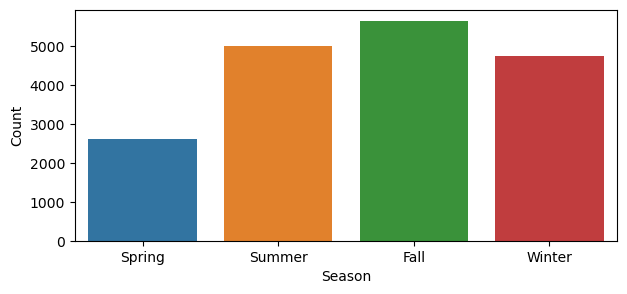

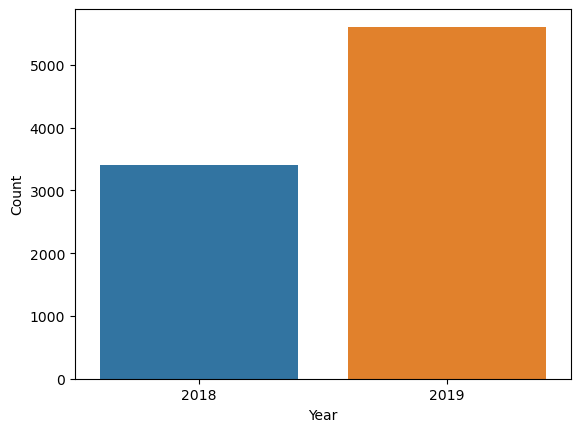

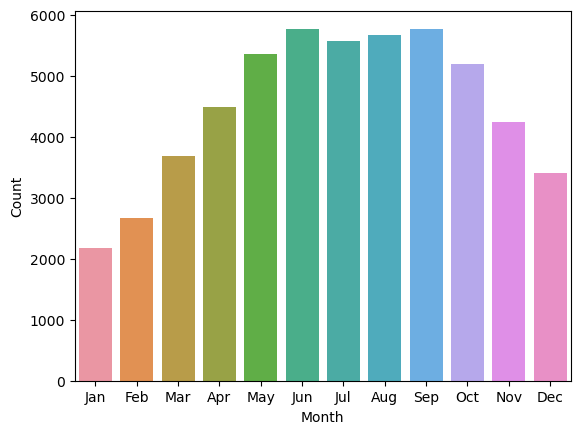

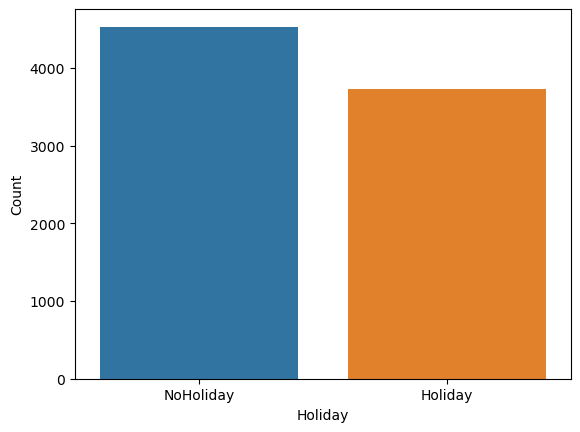

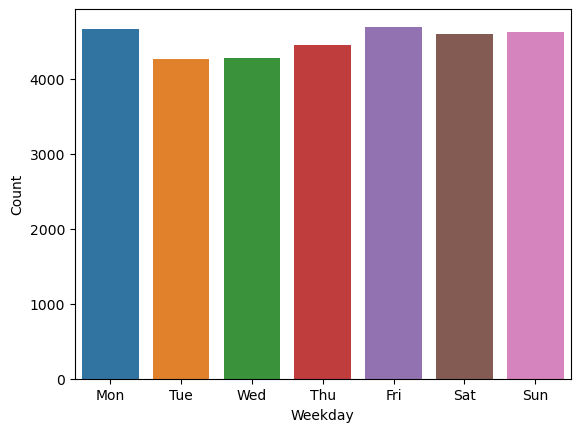

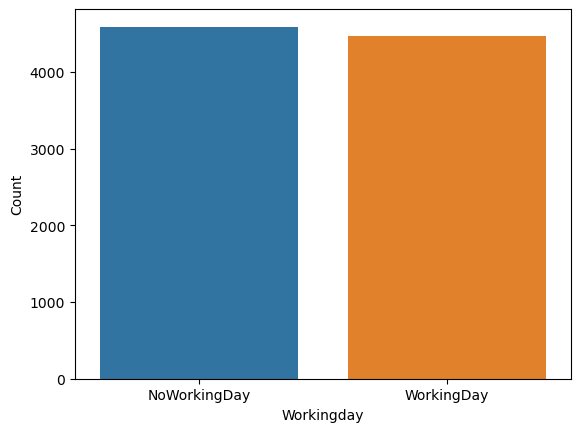

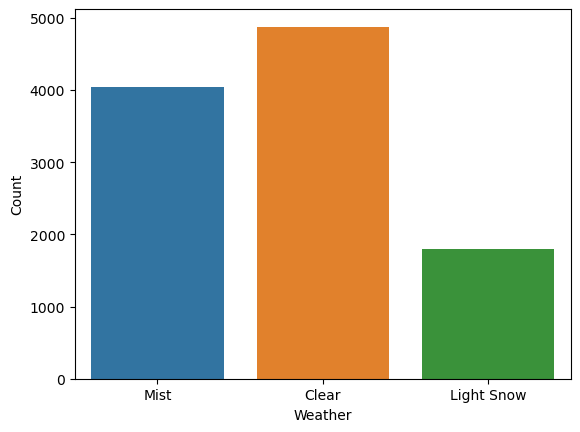

In [13]:
col = ['Season', 'Year', 'Month', 'Holiday', 'Weekday','Workingday','Weather']

plt.figure(figsize=(7,3))
for i in col:
    sns.barplot(x=i,y = 'Count',data=bike_data, ci=None)
    plt.show()

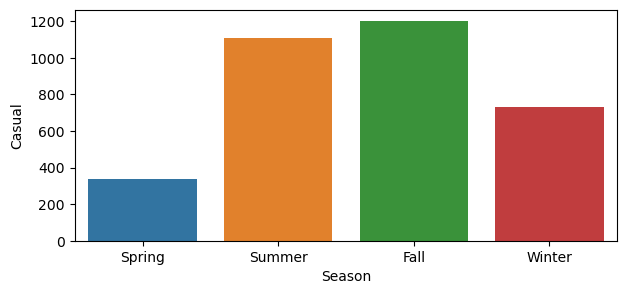

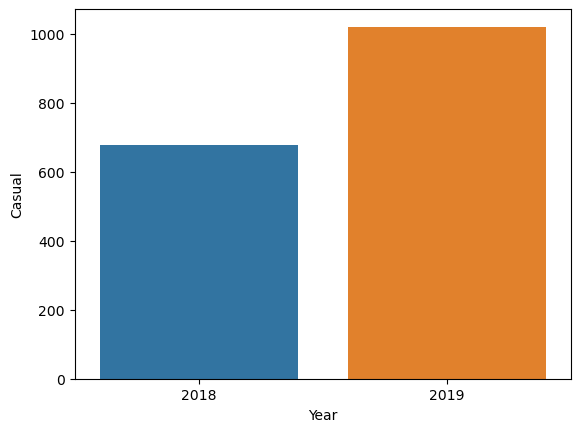

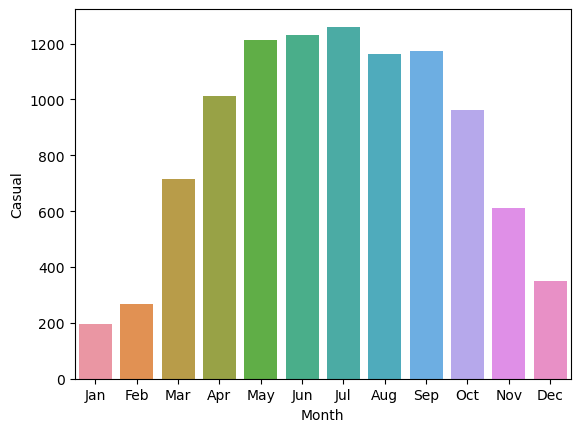

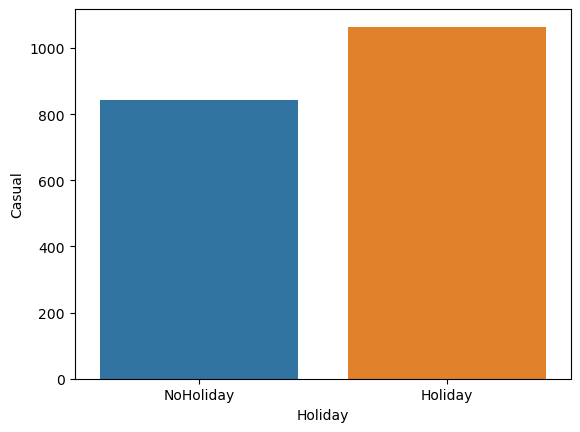

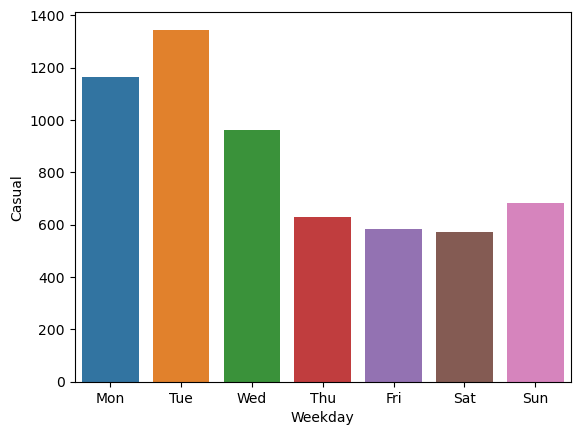

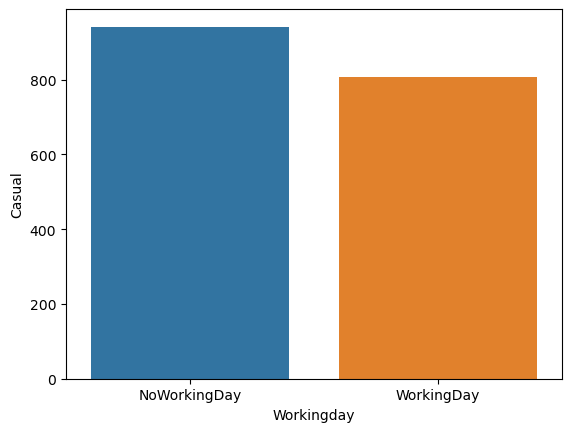

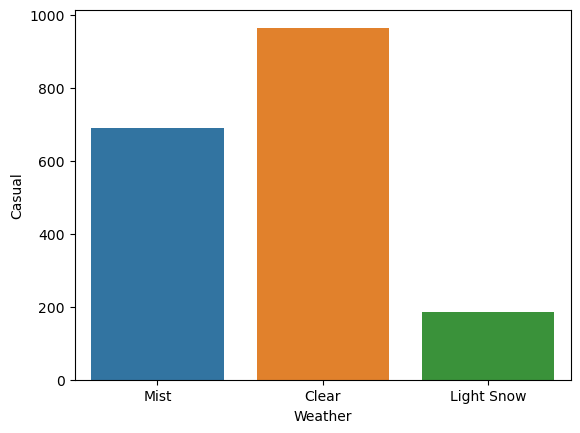

In [14]:
col = ['Season', 'Year', 'Month', 'Holiday', 'Weekday','Workingday','Weather']

plt.figure(figsize=(7,3))
for i in col:
    sns.barplot(x=i,y = 'Casual',data=bike_data, ci=None)
    plt.show()

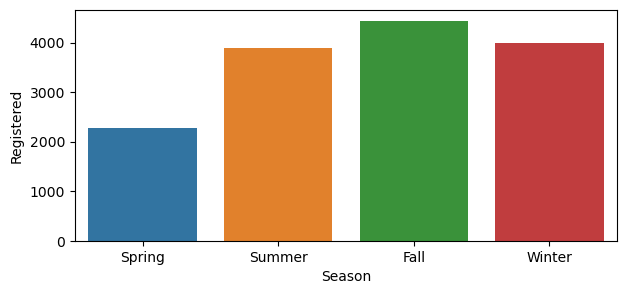

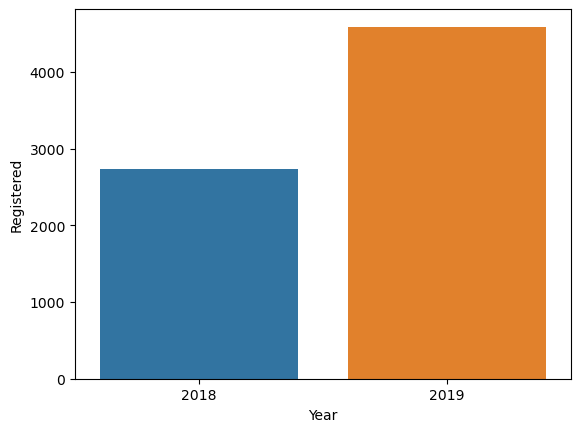

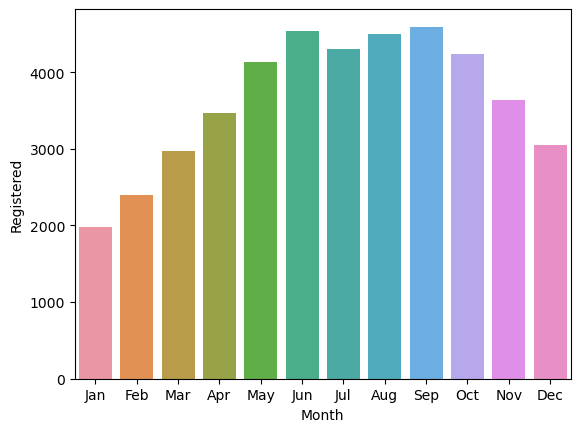

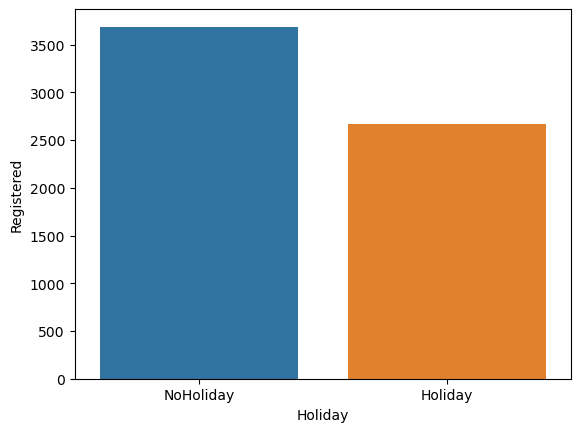

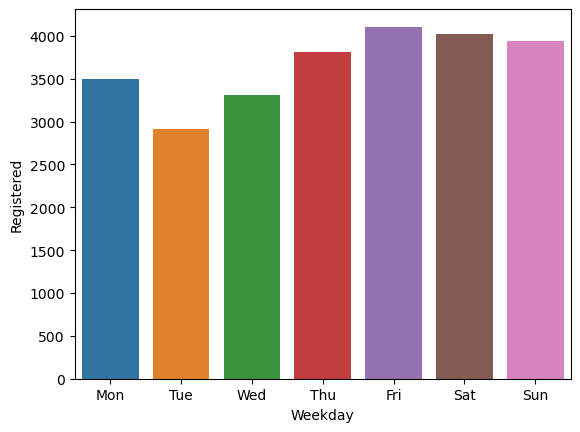

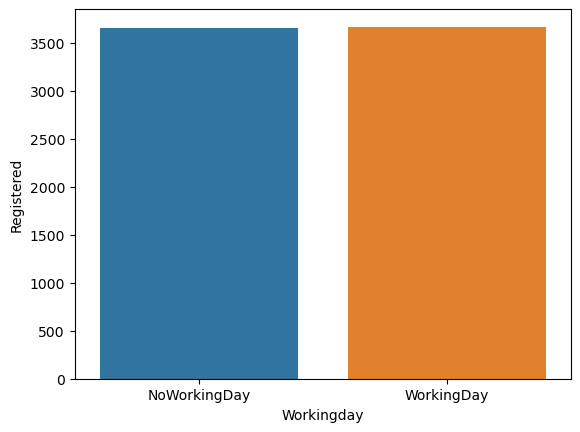

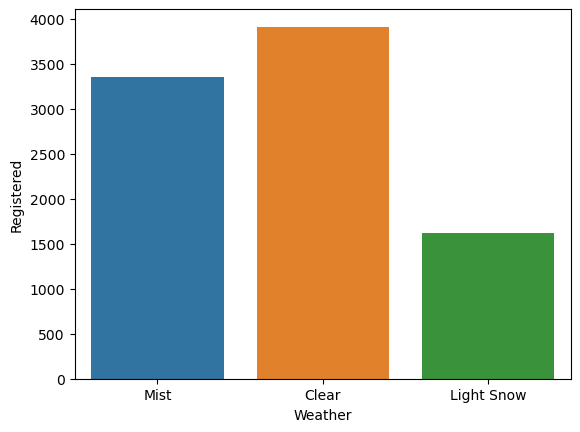

In [15]:
col = ['Season', 'Year', 'Month', 'Holiday', 'Weekday','Workingday','Weather']

plt.figure(figsize=(7,3))
for i in col:
    sns.barplot(x=i,y = 'Registered',data=bike_data, ci=None)
    plt.show()

In [16]:
print(f" Casual Total : {bike_data['Casual'].sum()} Registered Total : {bike_data['Registered'].sum()} Total : {bike_data['Count'].sum()} ")

 Casual Total : 619952 Registered Total : 2670893 Total : 3290845 


#### From the above graphs, we can see that the trend in Registered bikes and total (registered + casual bikes) is similar. As per the numbers, casual registrations is appro 18% of total registration.

### The usage of casual bikes is more on no working day than working day. It is also more on Monday and Tuesday compared to registered bikes. The usage of casual bikes more on holidays.

<AxesSubplot:xlabel='Weekday', ylabel='Count'>

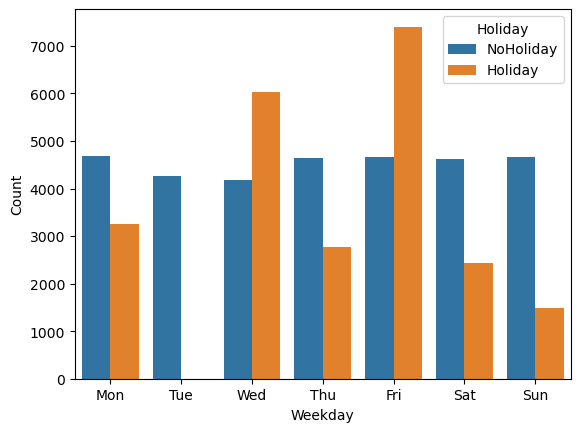

In [17]:
  sns.barplot(x="Weekday",y = 'Count',data=bike_data, ci=None, hue='Holiday')

##### The bike sharing numbers are higher on Friday if it is a holiday.

<AxesSubplot:xlabel='Weekday', ylabel='Count'>

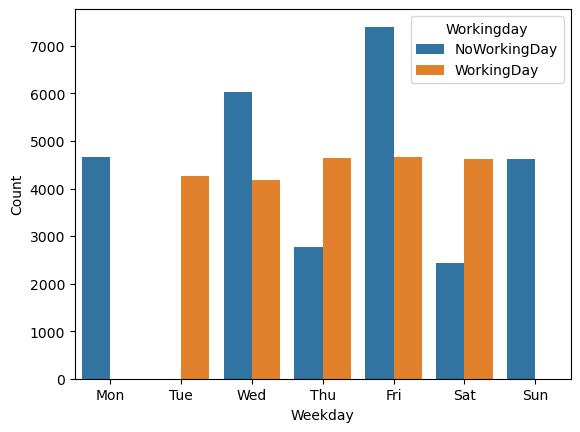

In [18]:
  sns.barplot(x="Weekday",y = 'Count',data=bike_data, ci=None, hue='Workingday')

#### The bike sharing numbers are higher on Friday if it is a non working day.

<AxesSubplot:>

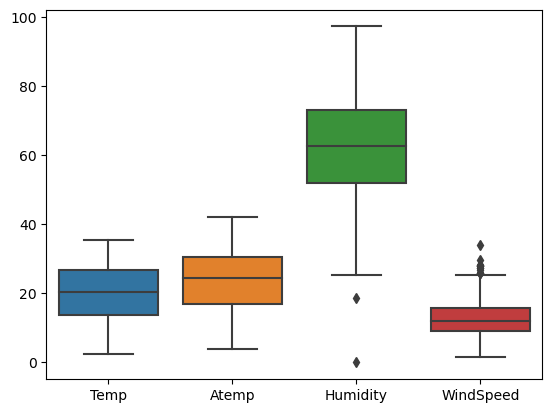

In [19]:
# Lets check the numerical data

sns.boxplot(data=bike_data[['Temp','Atemp','Humidity','WindSpeed']])

### Outlier treatment

#### There are outliers in Humidity and WindSpeed columns. Let's impute mean values to in place of outliers.

In [20]:
# Deletong the outliers below 10th and above 90th percentile

outlier_col = ['Humidity','WindSpeed']
for col in outlier_col: 
    q1 = bike_data[col].quantile(0.25)
    q3 = bike_data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    

    bike_data[col] = bike_data[col].apply(lambda x: np.nan if x < range_low or x > range_high else x)

bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RecordNo    730 non-null    int64         
 1   Date        730 non-null    datetime64[ns]
 2   Season      730 non-null    category      
 3   Year        730 non-null    category      
 4   Month       730 non-null    category      
 5   Holiday     730 non-null    category      
 6   Weekday     730 non-null    category      
 7   Workingday  730 non-null    category      
 8   Weather     730 non-null    object        
 9   Temp        730 non-null    float64       
 10  Atemp       730 non-null    float64       
 11  Humidity    728 non-null    float64       
 12  WindSpeed   717 non-null    float64       
 13  Casual      730 non-null    int64         
 14  Registered  730 non-null    int64         
 15  Count       730 non-null    int64         
dtypes: category(6), datetime64

In [21]:
# Fill in the null values with mean

bike_data['Humidity'] = bike_data['Humidity'].fillna(bike_data['Humidity'].median())
bike_data['WindSpeed'] = bike_data['WindSpeed'].fillna(bike_data['WindSpeed'].median())

In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RecordNo    730 non-null    int64         
 1   Date        730 non-null    datetime64[ns]
 2   Season      730 non-null    category      
 3   Year        730 non-null    category      
 4   Month       730 non-null    category      
 5   Holiday     730 non-null    category      
 6   Weekday     730 non-null    category      
 7   Workingday  730 non-null    category      
 8   Weather     730 non-null    object        
 9   Temp        730 non-null    float64       
 10  Atemp       730 non-null    float64       
 11  Humidity    730 non-null    float64       
 12  WindSpeed   730 non-null    float64       
 13  Casual      730 non-null    int64         
 14  Registered  730 non-null    int64         
 15  Count       730 non-null    int64         
dtypes: category(6), datetime64

<AxesSubplot:>

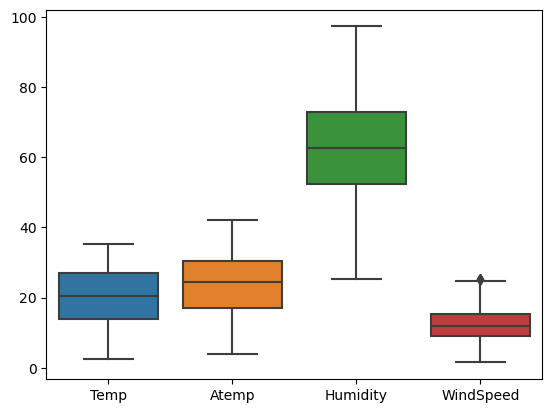

In [23]:
sns.boxplot(data=bike_data[['Temp','Atemp','Humidity','WindSpeed']])

<Figure size 400x200 with 0 Axes>

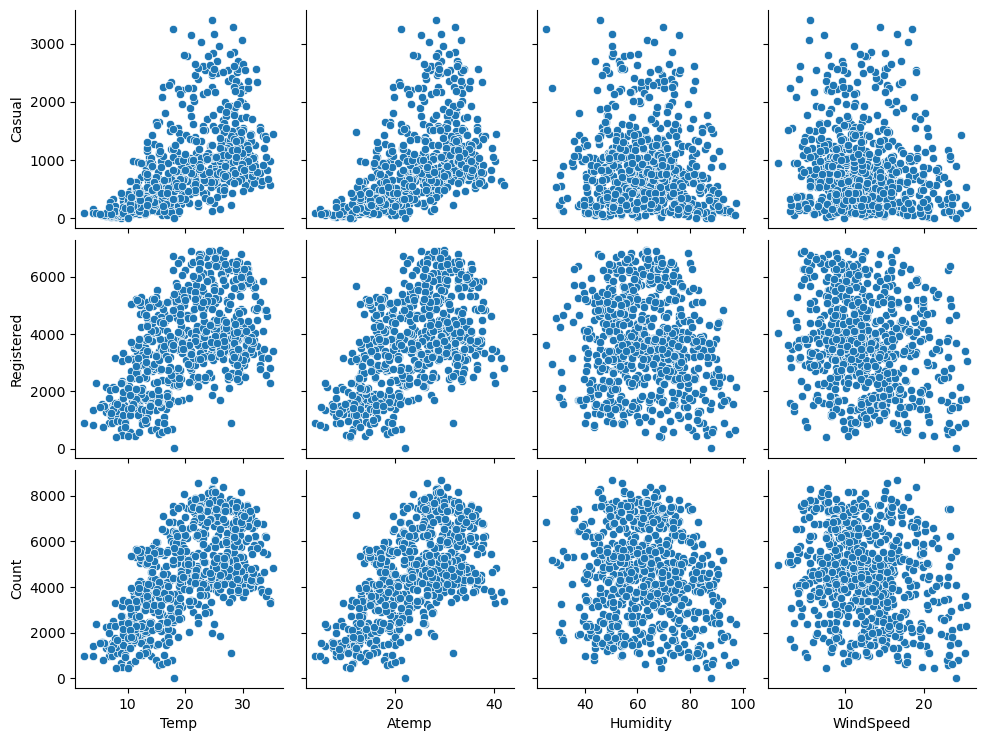

In [24]:
# Lets check numeric data

plt.figure(figsize=(4,2))
sns.pairplot(data = bike_data, x_vars = ['Temp','Atemp','Humidity','WindSpeed'], y_vars=['Casual','Registered','Count'])
plt.show()

#### Temp and Atemp show strong correlation with count,registered and casual.

<AxesSubplot:>

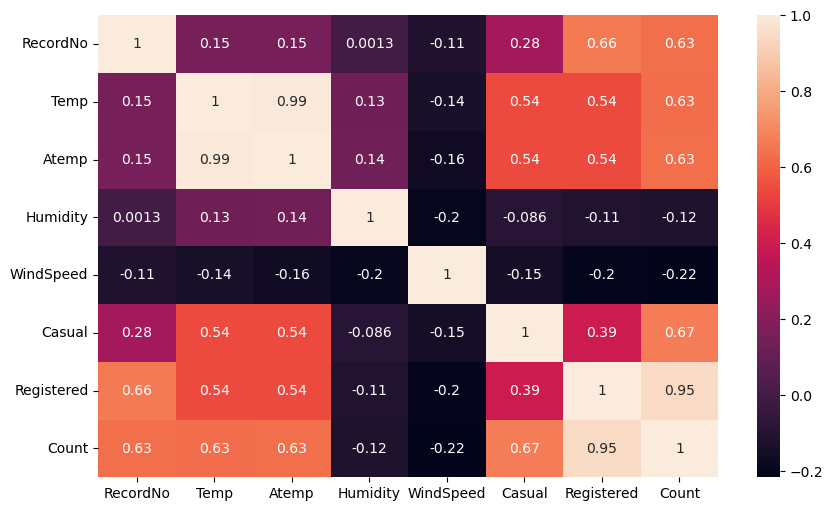

In [25]:
# Lets check the heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(bike_data.corr(), annot=True)

#### Temp and Atemp are highly correlated to each other. Atemp (feeling temperature) to be dropped from the analysis. Recordno is an irrelavant column for the analysis hence will be dropped. Count is total of registered and casual count hence there is a high correlation between these 2 with count. Total count will be retained and Registered & Casual to be dropped.


In [26]:
# Create a copy of the dataframe before modeling.
bike_data_1 = bike_data.copy()

In [27]:
# Delete the irrelevant columns for the analysis.
bike_data_1.drop(['RecordNo','Atemp','Casual','Registered','Date'], axis=1, inplace=True)

In [28]:
bike_data_1.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temp,Humidity,WindSpeed,Count
0,Spring,2018,Jan,NoHoliday,Tue,WorkingDay,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,NoHoliday,Wed,WorkingDay,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,NoHoliday,Thu,WorkingDay,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,NoHoliday,Fri,WorkingDay,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,NoHoliday,Sat,WorkingDay,Clear,9.305237,43.6957,12.522300,1600


### Train Test split

In [29]:
# Import the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [30]:
# Split the dataset into features (X) and target variable (y)
X = bike_data_1.drop('Count', axis=1)
y = bike_data_1['Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape} ')

X_train shape: (511, 10), X_test shape: (219, 10), y_train shape: (511,), y_test shape: (219,) 


### Categorical variable encoding and numerical variable scaling. 

In [32]:
categorical_col = ['Season','Year','Month','Holiday','Weekday','Workingday','Weather']
numerical_col = ['Temp','Humidity','WindSpeed']

categorical_col_encoded = pd.get_dummies(X_train[categorical_col],drop_first=True)

In [33]:
X_train = pd.concat([X_train[numerical_col],categorical_col_encoded],axis=1)
X_train.head()

,Temp,Humidity,WindSpeed,Season_Summer,Season_Fall,Season_Winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,...,Holiday_Holiday,Weekday_Tue,Weekday_Wed,Weekday_Thu,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_WorkingDay,Weather_Light Snow,Weather_Mist
683,13.188347,62.0417,10.250129,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
645,15.716653,70.9583,12.708493,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
163,26.035000,49.4583,20.458450,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
360,13.325000,76.2500,12.626150,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
640,26.957500,79.3750,4.458569,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_col = ['Temp','Humidity','WindSpeed']

X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_train.head()

,Temp,Humidity,WindSpeed,Season_Summer,Season_Fall,Season_Winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,...,Holiday_Holiday,Weekday_Tue,Weekday_Wed,Weekday_Thu,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_WorkingDay,Weather_Light Snow,Weather_Mist
683,0.327133,0.511344,0.367133,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
645,0.403972,0.635834,0.470283,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0.717562,0.335659,0.795461,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
360,0.331287,0.709714,0.466828,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
640,0.745598,0.753345,0.124127,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [35]:
X_train.describe()

,Temp,Humidity,WindSpeed,Season_Summer,Season_Fall,Season_Winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,...,Holiday_Holiday,Weekday_Tue,Weekday_Wed,Weekday_Thu,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_WorkingDay,Weather_Light Snow,Weather_Mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.550874,0.533168,0.459540,0.258317,0.260274,0.250489,0.520548,0.074364,0.062622,0.086106,...,0.027397,0.148728,0.156556,0.133072,0.135029,0.150685,0.142857,0.698630,0.029354,0.346380
std,0.227231,0.190617,0.199653,0.438138,0.439214,0.433719,0.500067,0.262619,0.242520,0.280795,...,0.163398,0.356169,0.363738,0.339986,0.342090,0.358092,0.350270,0.459303,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354221,0.385107,0.316438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.575304,0.539267,0.431817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.745079,0.670738,0.583910,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 683 to 102
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp                   511 non-null    float64
 1   Humidity               511 non-null    float64
 2   WindSpeed              511 non-null    float64
 3   Season_Summer          511 non-null    uint8  
 4   Season_Fall            511 non-null    uint8  
 5   Season_Winter          511 non-null    uint8  
 6   Year_2019              511 non-null    uint8  
 7   Month_Feb              511 non-null    uint8  
 8   Month_Mar              511 non-null    uint8  
 9   Month_Apr              511 non-null    uint8  
 10  Month_May              511 non-null    uint8  
 11  Month_Jun              511 non-null    uint8  
 12  Month_Jul              511 non-null    uint8  
 13  Month_Aug              511 non-null    uint8  
 14  Month_Sep              511 non-null    uint8  
 15  Mont

### Linear regression model building

##### Import libraries related to Linear Regression and RFE. RFE (Recursive Feature Elimination) is a feature selection technique used in combination with linear regression to identify the most relevant features for prediction. It is a backward elimination approach that recursively eliminates features from the model until a desired number of features is left.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Fall', True, 1),
 ('Season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Feb', False, 3),
 ('Month_Mar', True, 1),
 ('Month_Apr', False, 3),
 ('Month_May', False, 3),
 ('Month_Jun', False, 3),
 ('Month_Jul', False, 2),
 ('Month_Aug', False, 3),
 ('Month_Sep', True, 1),
 ('Month_Oct', True, 1),
 ('Month_Nov', True, 1),
 ('Month_Dec', False, 2),
 ('Holiday_Holiday', True, 1),
 ('Weekday_Tue', False, 2),
 ('Weekday_Wed', False, 3),
 ('Weekday_Thu', False, 2),
 ('Weekday_Fri', False, 3),
 ('Weekday_Sat', False, 3),
 ('Weekday_Sun', False, 3),
 ('Workingday_WorkingDay', False, 3),
 ('Weather_Light Snow', True, 1),
 ('Weather_Mist', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['Temp', 'Humidity', 'WindSpeed', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'Year_2019', 'Month_Mar', 'Month_Sep', 'Month_Oct',
       'Month_Nov', 'Holiday_Holiday', 'Weather_Light Snow', 'Weather_Mist'],
      dtype='object')

In [41]:
import statsmodels
import statsmodels.api as sm

X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.77e-184
Time:                        00:04:17   Log-Likelihood:                -4130.9
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8355.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1423.7910    202

#### Summary interpretation

R-squared and Adj. R-squared: The R-squared value is 0.835, indicating that 83.5% of the variance in the dependent variable (Count) can be explained by the independent variables included in the model. The adjusted R-squared value (0.830) adjusts for the number of predictors in the model.

F-statistic and Prob (F-statistic): The F-statistic is 178.7, which tests the overall significance of the model. The associated p-value (Prob (F-statistic)) is 2.07e-183, indicating that the model's overall fit is statistically significant.

Coefficients: The coefficient estimates represent the expected change in the dependent variable (Count) for a one-unit change in each corresponding independent variable, while holding other variables constant.

Standard errors: The standard errors (std err) measure the uncertainty or variability associated with each coefficient estimate.

P>|t|: The  p-values (P>|t|) indicate the statistical significance of each coefficient. A p-value less than the significance level (commonly 0.05) suggests that the corresponding coefficient is statistically significant.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.91
5,Season_Fall,5.63
6,Season_Winter,4.61
1,Temp,3.79
4,Season_Summer,3.10
11,Month_Nov,2.37
10,Month_Oct,2.30
2,Humidity,2.01
14,Weather_Mist,1.65
13,Weather_Light Snow,1.41


#### Month_Nov : Drop this column based on p value.

In [43]:
X_train = X_train.drop(['Month_Nov'],axis=1)

In [44]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Fall', True, 1),
 ('Season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Feb', False, 3),
 ('Month_Mar', True, 1),
 ('Month_Apr', False, 3),
 ('Month_May', False, 2),
 ('Month_Jun', False, 3),
 ('Month_Jul', False, 3),
 ('Month_Aug', False, 3),
 ('Month_Sep', True, 1),
 ('Month_Oct', True, 1),
 ('Month_Dec', False, 3),
 ('Holiday_Holiday', True, 1),
 ('Weekday_Tue', False, 2),
 ('Weekday_Wed', False, 2),
 ('Weekday_Thu', False, 2),
 ('Weekday_Fri', False, 3),
 ('Weekday_Sat', False, 3),
 ('Weekday_Sun', False, 3),
 ('Workingday_WorkingDay', False, 3),
 ('Weather_Light Snow', True, 1),
 ('Weather_Mist', True, 1)]

In [46]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Temp', 'Humidity', 'WindSpeed', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'Year_2019', 'Month_Mar', 'Month_Sep', 'Month_Oct',
       'Holiday_Holiday', 'Weather_Light Snow', 'Weather_Mist'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col1]
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.33e-185
Time:                        00:04:17   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     497   BIC:                             8350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1420.0596    201

#### Summary interpretation
The R-squared value is 0.836, indicating that approximately 83.6% of the variability in the dependent variable can be explained by the independent variables.
A higher adjusted R-squared value (in this case, 0.831) indicates a better fit of the model.
All variables have p-values less than 0.05, suggesting they are statistically significant.

In [48]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.88
5,Season_Fall,5.48
1,Temp,3.72
4,Season_Summer,3.07
6,Season_Winter,2.42
2,Humidity,2.01
13,Weather_Mist,1.64
10,Month_Oct,1.54
12,Weather_Light Snow,1.40
9,Month_Sep,1.21


#### Variance Inflation Factor (VIF) is a measure of multicollinearity. Less than 5 is an acceptable range for VIF. Season fall is an important variable hence will retain the same. Delete Month_Mar and Holiday_holiday based on p-value.

In [49]:
X_train = X_train.drop(['Month_Mar','Holiday_Holiday'],axis=1)

In [50]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe = RFE(lm2, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Fall', True, 1),
 ('Season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Feb', False, 3),
 ('Month_Apr', False, 3),
 ('Month_May', False, 3),
 ('Month_Jun', False, 3),
 ('Month_Jul', False, 3),
 ('Month_Aug', False, 3),
 ('Month_Sep', True, 1),
 ('Month_Oct', False, 3),
 ('Month_Dec', False, 3),
 ('Weekday_Tue', True, 1),
 ('Weekday_Wed', True, 1),
 ('Weekday_Thu', True, 1),
 ('Weekday_Fri', False, 2),
 ('Weekday_Sat', False, 2),
 ('Weekday_Sun', False, 3),
 ('Workingday_WorkingDay', False, 2),
 ('Weather_Light Snow', True, 1),
 ('Weather_Mist', False, 3)]

In [52]:
col2 = X_train.columns[rfe.support_]
col2

Index(['Temp', 'Humidity', 'WindSpeed', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'Year_2019', 'Month_Sep', 'Weekday_Tue', 'Weekday_Wed',
       'Weekday_Thu', 'Weather_Light Snow'],
      dtype='object')

In [53]:
X_train_rfe = X_train[col2]
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.04e-177
Time:                        00:04:17   Log-Likelihood:                -4152.1
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     498   BIC:                             8385.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1683.0078    201

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.24
5,Season_Fall,5.17
1,Temp,3.46
4,Season_Summer,2.93
6,Season_Winter,2.01
2,Humidity,1.29
12,Weather_Light Snow,1.20
8,Month_Sep,1.19
3,WindSpeed,1.17
10,Weekday_Wed,1.10


### Delete 'Weekday_Tue','Weekday_Wed','Weekday_Thu' based on p-value.

In [55]:
X_train = X_train.drop(['Weekday_Tue','Weekday_Wed','Weekday_Thu'],axis=1)

In [56]:
lm3 = LinearRegression()
lm3.fit(X_train, y_train)

rfe = RFE(lm3, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Fall', True, 1),
 ('Season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Feb', False, 3),
 ('Month_Apr', False, 3),
 ('Month_May', False, 3),
 ('Month_Jun', False, 3),
 ('Month_Jul', False, 2),
 ('Month_Aug', False, 3),
 ('Month_Sep', True, 1),
 ('Month_Oct', True, 1),
 ('Month_Dec', False, 3),
 ('Weekday_Fri', False, 3),
 ('Weekday_Sat', False, 3),
 ('Weekday_Sun', False, 3),
 ('Workingday_WorkingDay', False, 3),
 ('Weather_Light Snow', True, 1),
 ('Weather_Mist', True, 1)]

In [58]:
col3 = X_train.columns[rfe.support_]
col3

Index(['Temp', 'Humidity', 'WindSpeed', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'Year_2019', 'Month_Sep', 'Month_Oct',
       'Weather_Light Snow', 'Weather_Mist'],
      dtype='object')

In [59]:
X_train_rfe = X_train[col3]
X_train_rfe = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.99e-183
Time:                        00:04:18   Log-Likelihood:                -4141.3
No. Observations:                 511   AIC:                             8307.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1454.2818    203

In [60]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.16
5,Season_Fall,5.32
1,Temp,3.71
4,Season_Summer,3.02
6,Season_Winter,2.29
2,Humidity,2.01
11,Weather_Mist,1.63
9,Month_Oct,1.54
10,Weather_Light Snow,1.39
8,Month_Sep,1.21


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_pred = lm3.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

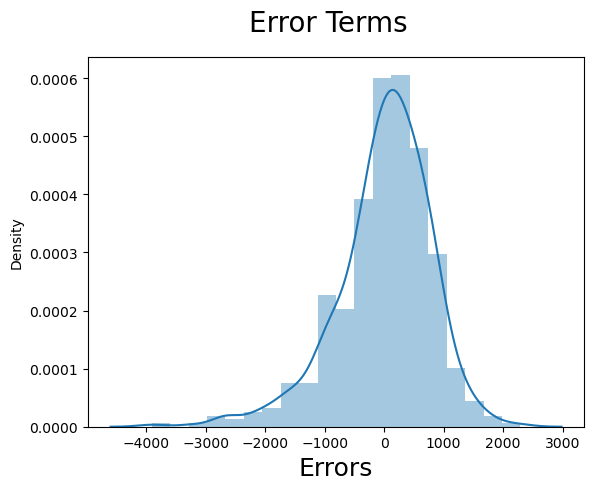

In [62]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

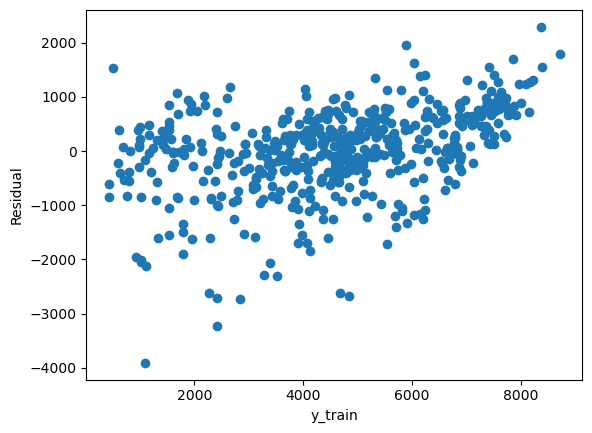

In [63]:
residuals=(y_train-y_train_pred)
plt.scatter(y_train,residuals)
plt.xlabel("y_train")
plt.ylabel("Residual")
plt.show()

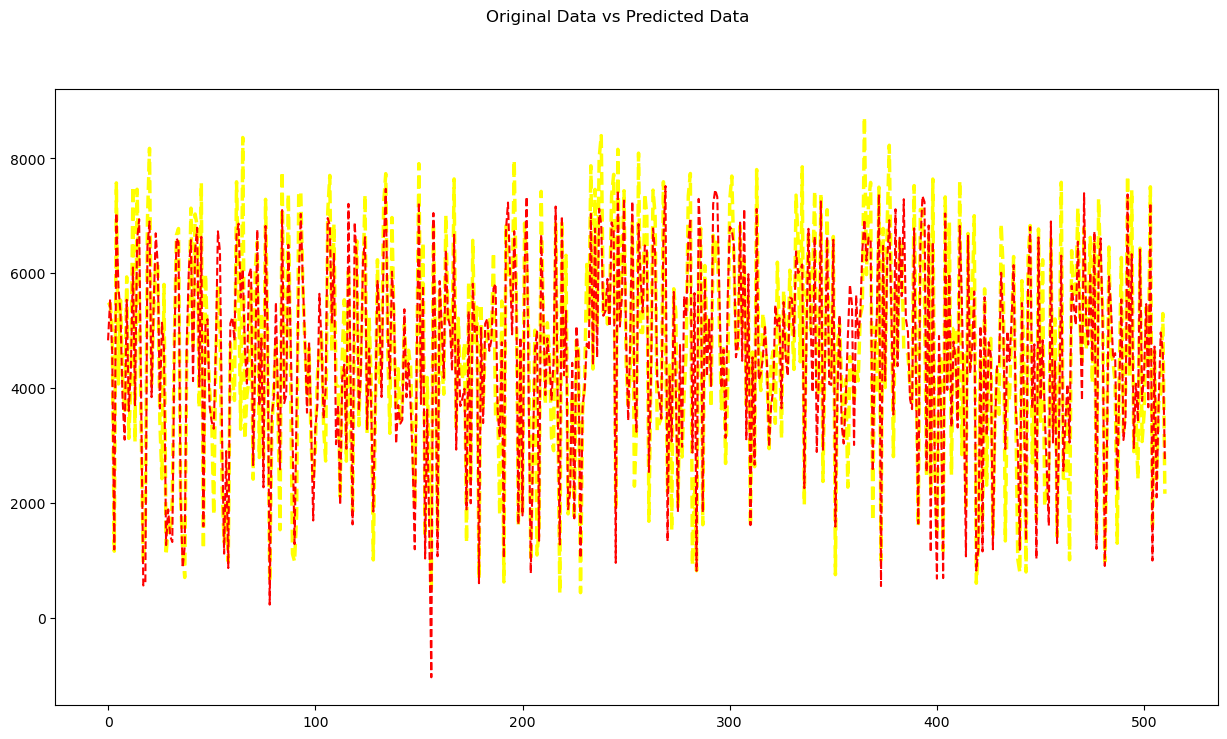

In [64]:
a = [i for i in range(0,len(y_train),1)]
plt.figure(figsize = (15, 8))
plt.plot(a,y_train, color="yellow", linewidth=2.5, linestyle='--')
plt.plot(a,y_train_pred, color="red",  linewidth=1.5, linestyle='--')
plt.suptitle('Original Data vs Predicted Data', fontsize = 12)
plt.show()

### Making Predictions
 Applying the scaling on the test sets

#### Categorical variable encoding and numerical variable scaling. 

In [65]:
categorical_col = ['Season','Year','Month','Holiday','Weekday','Workingday','Weather']
numerical_col = ['Temp','Humidity','WindSpeed']

categorical_col_encoded = pd.get_dummies(X_test[categorical_col],drop_first=True)

In [66]:
X_test = pd.concat([X_test[numerical_col],categorical_col_encoded],axis=1)
X_test.head()

,Temp,Humidity,WindSpeed,Season_Summer,Season_Fall,Season_Winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,...,Holiday_Holiday,Weekday_Tue,Weekday_Wed,Weekday_Thu,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_WorkingDay,Weather_Light Snow,Weather_Mist
468,20.295000,50.2917,12.791439,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
148,27.367500,81.8750,14.333846,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
302,13.085847,62.3750,11.833339,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
355,17.356653,75.7500,3.167425,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
515,27.880000,49.2917,13.083693,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_col = ['Temp','Humidity','WindSpeed']

X_test[numerical_col] = scaler.transform(X_test[numerical_col])
X_test.head()


,Temp,Humidity,WindSpeed,Season_Summer,Season_Fall,Season_Winter,Year_2019,Month_Feb,Month_Mar,Month_Apr,...,Holiday_Holiday,Weekday_Tue,Weekday_Wed,Weekday_Thu,Weekday_Fri,Weekday_Sat,Weekday_Sun,Workingday_WorkingDay,Weather_Light Snow,Weather_Mist
468,0.536626,0.311966,0.448707,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
148,0.769438,0.774725,0.520308,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
302,0.299316,0.489011,0.404231,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
355,0.439902,0.684982,0.001944,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
515,0.786308,0.297314,0.462274,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
col3 = X_train.columns[rfe.support_]
col3

Index(['Temp', 'Humidity', 'WindSpeed', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'Year_2019', 'Month_Sep', 'Month_Oct',
       'Weather_Light Snow', 'Weather_Mist'],
      dtype='object')

In [69]:
X_test=X_test[col3]
X_test.shape

(219, 11)

In [70]:
X_test = sm.add_constant(X_test)
y_pred = lm3.predict(X_test)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

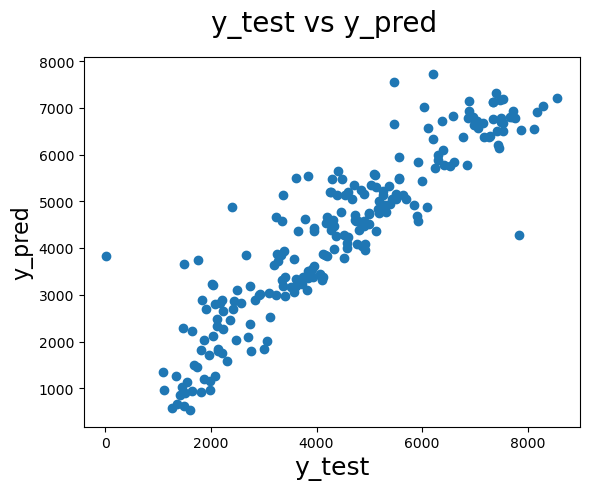

In [71]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train R-Score:  0.8290922756184566
Test R-Score:  0.8217593238172292
